In [2]:
from torchvision import datasets
from torchvision.transforms import ToTensor

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download= True
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor(),
    download= True
)

100.0%


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100.0%
9.9%

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100.0%
100.0%


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [10]:
train_data.data.size()

torch.Size([60000, 28, 28])

In [11]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [12]:
train_data.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [13]:
from torch.utils.data import DataLoader

loaders = {
    'train': DataLoader(train_data,
                        batch_size=100,
                        shuffle=True,
                        num_workers=1),
    'test': DataLoader(test_data,
                       batch_size=100,
                       shuffle=True,
                       num_workers=1),
}

In [14]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x159a9ab50>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x159a9afd0>}

In [15]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)

        return F.softmax(x)

In [23]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else 'cpu')

model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_indx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_indx % 20 == 0:
            print(f'Train Epoch: {epoch} [{batch_indx * len(data)}/{len(loaders["train"].dataset)} ({100. * batch_indx / len(loaders["train"]):.0f}%)]\t{loss.item():.6f}')

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss = loss_fn(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct = pred.eq(target.view_as(pred)).sum().item()

    test_loss = len(loaders['test'].dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f}%\n)')

In [24]:
for epoch in range(1, 11):
    train(epoch)
    test()

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/var/folders/v9/22hd8vh13rl1n0dqbfsly1v40000gn/T/ipykernel_80574/1791202494.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch: 1 [0/60000 (0%)]	2.304323
Train Epoch: 1 [2000/60000 (3%)]	2.296437
Train Epoch: 1 [4000/60000 (7%)]	2.261617
Train Epoch: 1 [6000/60000 (10%)]	2.104308
Train Epoch: 1 [8000/60000 (13%)]	1.954468
Train Epoch: 1 [10000/60000 (17%)]	1.884838
Train Epoch: 1 [12000/60000 (20%)]	1.883588
Train Epoch: 1 [14000/60000 (23%)]	1.782172
Train Epoch: 1 [16000/60000 (27%)]	1.678362
Train Epoch: 1 [18000/60000 (30%)]	1.750116
Train Epoch: 1 [20000/60000 (33%)]	1.749600
Train Epoch: 1 [22000/60000 (37%)]	1.683538
Train Epoch: 1 [24000/60000 (40%)]	1.681810
Train Epoch: 1 [26000/60000 (43%)]	1.680615
Train Epoch: 1 [28000/60000 (47%)]	1.617038
Train Epoch: 1 [30000/60000 (50%)]	1.635078
Train Epoch: 1 [32000/60000 (53%)]	1.690678
Train Epoch: 1 [34000/60000 (57%)]	1.669081
Train Epoch: 1 [36000/60000 (60%)]	1.631492
Train Epoch: 1 [38000/60000 (63%)]	1.625873
Train Epoch: 1 [40000/60000 (67%)]	1.640929
Train Epoch: 1 [42000/60000 (70%)]	1.610900
Train Epoch: 1 [44000/60000 (73%)]	1.555032

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Test set: Average loss: 10000.0000, Accuracy 94/10000 (1%
)


/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train Epoch: 2 [0/60000 (0%)]	1.588602
Train Epoch: 2 [2000/60000 (3%)]	1.624725
Train Epoch: 2 [4000/60000 (7%)]	1.609194
Train Epoch: 2 [6000/60000 (10%)]	1.653158
Train Epoch: 2 [8000/60000 (13%)]	1.632364
Train Epoch: 2 [10000/60000 (17%)]	1.588100
Train Epoch: 2 [12000/60000 (20%)]	1.611947
Train Epoch: 2 [14000/60000 (23%)]	1.622497
Train Epoch: 2 [16000/60000 (27%)]	1.546946
Train Epoch: 2 [18000/60000 (30%)]	1.604085
Train Epoch: 2 [20000/60000 (33%)]	1.530523
Train Epoch: 2 [22000/60000 (37%)]	1.586367
Train Epoch: 2 [24000/60000 (40%)]	1.565059
Train Epoch: 2 [26000/60000 (43%)]	1.569862
Train Epoch: 2 [28000/60000 (47%)]	1.588881
Train Epoch: 2 [30000/60000 (50%)]	1.590318
Train Epoch: 2 [32000/60000 (53%)]	1.535983
Train Epoch: 2 [34000/60000 (57%)]	1.549324
Train Epoch: 2 [36000/60000 (60%)]	1.547133
Train Epoch: 2 [38000/60000 (63%)]	1.648803
Train Epoch: 2 [40000/60000 (67%)]	1.597556
Train Epoch: 2 [42000/60000 (70%)]	1.574046
Train Epoch: 2 [44000/60000 (73%)]	1.626274

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Test set: Average loss: 10000.0000, Accuracy 97/10000 (1%
)


/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train Epoch: 3 [0/60000 (0%)]	1.577821
Train Epoch: 3 [2000/60000 (3%)]	1.515036
Train Epoch: 3 [4000/60000 (7%)]	1.614178
Train Epoch: 3 [6000/60000 (10%)]	1.608990
Train Epoch: 3 [8000/60000 (13%)]	1.541201
Train Epoch: 3 [10000/60000 (17%)]	1.641757
Train Epoch: 3 [12000/60000 (20%)]	1.592999
Train Epoch: 3 [14000/60000 (23%)]	1.601651
Train Epoch: 3 [16000/60000 (27%)]	1.561725
Train Epoch: 3 [18000/60000 (30%)]	1.530875
Train Epoch: 3 [20000/60000 (33%)]	1.568719
Train Epoch: 3 [22000/60000 (37%)]	1.555106
Train Epoch: 3 [24000/60000 (40%)]	1.568150
Train Epoch: 3 [26000/60000 (43%)]	1.567724
Train Epoch: 3 [28000/60000 (47%)]	1.554760
Train Epoch: 3 [30000/60000 (50%)]	1.619640
Train Epoch: 3 [32000/60000 (53%)]	1.610278
Train Epoch: 3 [34000/60000 (57%)]	1.534864
Train Epoch: 3 [36000/60000 (60%)]	1.551517
Train Epoch: 3 [38000/60000 (63%)]	1.516482
Train Epoch: 3 [40000/60000 (67%)]	1.568136
Train Epoch: 3 [42000/60000 (70%)]	1.594236
Train Epoch: 3 [44000/60000 (73%)]	1.588562

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Test set: Average loss: 10000.0000, Accuracy 97/10000 (1%
)


/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train Epoch: 4 [0/60000 (0%)]	1.566594
Train Epoch: 4 [2000/60000 (3%)]	1.537254
Train Epoch: 4 [4000/60000 (7%)]	1.568332
Train Epoch: 4 [6000/60000 (10%)]	1.547958
Train Epoch: 4 [8000/60000 (13%)]	1.582084
Train Epoch: 4 [10000/60000 (17%)]	1.550116
Train Epoch: 4 [12000/60000 (20%)]	1.541850
Train Epoch: 4 [14000/60000 (23%)]	1.594784
Train Epoch: 4 [16000/60000 (27%)]	1.585251
Train Epoch: 4 [18000/60000 (30%)]	1.506979
Train Epoch: 4 [20000/60000 (33%)]	1.588935
Train Epoch: 4 [22000/60000 (37%)]	1.603178
Train Epoch: 4 [24000/60000 (40%)]	1.586294
Train Epoch: 4 [26000/60000 (43%)]	1.556870
Train Epoch: 4 [28000/60000 (47%)]	1.534234
Train Epoch: 4 [30000/60000 (50%)]	1.546227
Train Epoch: 4 [32000/60000 (53%)]	1.561155
Train Epoch: 4 [34000/60000 (57%)]	1.521329
Train Epoch: 4 [36000/60000 (60%)]	1.570400
Train Epoch: 4 [38000/60000 (63%)]	1.560495
Train Epoch: 4 [40000/60000 (67%)]	1.516524
Train Epoch: 4 [42000/60000 (70%)]	1.536180
Train Epoch: 4 [44000/60000 (73%)]	1.512942

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Test set: Average loss: 10000.0000, Accuracy 98/10000 (1%
)


/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train Epoch: 5 [0/60000 (0%)]	1.545014
Train Epoch: 5 [2000/60000 (3%)]	1.568398
Train Epoch: 5 [4000/60000 (7%)]	1.588310
Train Epoch: 5 [6000/60000 (10%)]	1.564564
Train Epoch: 5 [8000/60000 (13%)]	1.553819
Train Epoch: 5 [10000/60000 (17%)]	1.502696
Train Epoch: 5 [12000/60000 (20%)]	1.508043
Train Epoch: 5 [14000/60000 (23%)]	1.564929
Train Epoch: 5 [16000/60000 (27%)]	1.572198
Train Epoch: 5 [18000/60000 (30%)]	1.591231
Train Epoch: 5 [20000/60000 (33%)]	1.553846
Train Epoch: 5 [22000/60000 (37%)]	1.523453
Train Epoch: 5 [24000/60000 (40%)]	1.521249
Train Epoch: 5 [26000/60000 (43%)]	1.537001
Train Epoch: 5 [28000/60000 (47%)]	1.574088
Train Epoch: 5 [30000/60000 (50%)]	1.512493
Train Epoch: 5 [32000/60000 (53%)]	1.525998
Train Epoch: 5 [34000/60000 (57%)]	1.527439
Train Epoch: 5 [36000/60000 (60%)]	1.548922
Train Epoch: 5 [38000/60000 (63%)]	1.523830
Train Epoch: 5 [40000/60000 (67%)]	1.569947
Train Epoch: 5 [42000/60000 (70%)]	1.526334
Train Epoch: 5 [44000/60000 (73%)]	1.603703

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Test set: Average loss: 10000.0000, Accuracy 97/10000 (1%
)


/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train Epoch: 6 [0/60000 (0%)]	1.559789
Train Epoch: 6 [2000/60000 (3%)]	1.551074
Train Epoch: 6 [4000/60000 (7%)]	1.500956
Train Epoch: 6 [6000/60000 (10%)]	1.526887
Train Epoch: 6 [8000/60000 (13%)]	1.555235
Train Epoch: 6 [10000/60000 (17%)]	1.519987
Train Epoch: 6 [12000/60000 (20%)]	1.523092
Train Epoch: 6 [14000/60000 (23%)]	1.548700
Train Epoch: 6 [16000/60000 (27%)]	1.522985
Train Epoch: 6 [18000/60000 (30%)]	1.542386
Train Epoch: 6 [20000/60000 (33%)]	1.511373
Train Epoch: 6 [22000/60000 (37%)]	1.541016
Train Epoch: 6 [24000/60000 (40%)]	1.554103
Train Epoch: 6 [26000/60000 (43%)]	1.540303
Train Epoch: 6 [28000/60000 (47%)]	1.535767
Train Epoch: 6 [30000/60000 (50%)]	1.512686
Train Epoch: 6 [32000/60000 (53%)]	1.542965
Train Epoch: 6 [34000/60000 (57%)]	1.526072
Train Epoch: 6 [36000/60000 (60%)]	1.525016
Train Epoch: 6 [38000/60000 (63%)]	1.540987
Train Epoch: 6 [40000/60000 (67%)]	1.562258
Train Epoch: 6 [42000/60000 (70%)]	1.540283
Train Epoch: 6 [44000/60000 (73%)]	1.530405

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Test set: Average loss: 10000.0000, Accuracy 98/10000 (1%
)


/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train Epoch: 7 [0/60000 (0%)]	1.528887
Train Epoch: 7 [2000/60000 (3%)]	1.533111
Train Epoch: 7 [4000/60000 (7%)]	1.516621
Train Epoch: 7 [6000/60000 (10%)]	1.546092
Train Epoch: 7 [8000/60000 (13%)]	1.510783
Train Epoch: 7 [10000/60000 (17%)]	1.510518
Train Epoch: 7 [12000/60000 (20%)]	1.518559
Train Epoch: 7 [14000/60000 (23%)]	1.568281
Train Epoch: 7 [16000/60000 (27%)]	1.545154
Train Epoch: 7 [18000/60000 (30%)]	1.529225
Train Epoch: 7 [20000/60000 (33%)]	1.548160
Train Epoch: 7 [22000/60000 (37%)]	1.531068
Train Epoch: 7 [24000/60000 (40%)]	1.491957
Train Epoch: 7 [26000/60000 (43%)]	1.546941
Train Epoch: 7 [28000/60000 (47%)]	1.544965
Train Epoch: 7 [30000/60000 (50%)]	1.542252
Train Epoch: 7 [32000/60000 (53%)]	1.504733
Train Epoch: 7 [34000/60000 (57%)]	1.544808
Train Epoch: 7 [36000/60000 (60%)]	1.546978
Train Epoch: 7 [38000/60000 (63%)]	1.531093
Train Epoch: 7 [40000/60000 (67%)]	1.541928
Train Epoch: 7 [42000/60000 (70%)]	1.507461
Train Epoch: 7 [44000/60000 (73%)]	1.500864

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Test set: Average loss: 10000.0000, Accuracy 98/10000 (1%
)


/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train Epoch: 8 [0/60000 (0%)]	1.501713
Train Epoch: 8 [2000/60000 (3%)]	1.550939
Train Epoch: 8 [4000/60000 (7%)]	1.515425
Train Epoch: 8 [6000/60000 (10%)]	1.478035
Train Epoch: 8 [8000/60000 (13%)]	1.525143
Train Epoch: 8 [10000/60000 (17%)]	1.504442
Train Epoch: 8 [12000/60000 (20%)]	1.565290
Train Epoch: 8 [14000/60000 (23%)]	1.511056
Train Epoch: 8 [16000/60000 (27%)]	1.519670
Train Epoch: 8 [18000/60000 (30%)]	1.524953
Train Epoch: 8 [20000/60000 (33%)]	1.513204
Train Epoch: 8 [22000/60000 (37%)]	1.470414
Train Epoch: 8 [24000/60000 (40%)]	1.529310
Train Epoch: 8 [26000/60000 (43%)]	1.527438
Train Epoch: 8 [28000/60000 (47%)]	1.530663
Train Epoch: 8 [30000/60000 (50%)]	1.534975
Train Epoch: 8 [32000/60000 (53%)]	1.488293
Train Epoch: 8 [34000/60000 (57%)]	1.534118
Train Epoch: 8 [36000/60000 (60%)]	1.499233
Train Epoch: 8 [38000/60000 (63%)]	1.546916
Train Epoch: 8 [40000/60000 (67%)]	1.544210
Train Epoch: 8 [42000/60000 (70%)]	1.515453
Train Epoch: 8 [44000/60000 (73%)]	1.548843

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Test set: Average loss: 10000.0000, Accuracy 100/10000 (1%
)


/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train Epoch: 9 [0/60000 (0%)]	1.518838
Train Epoch: 9 [2000/60000 (3%)]	1.497905
Train Epoch: 9 [4000/60000 (7%)]	1.554566
Train Epoch: 9 [6000/60000 (10%)]	1.541730
Train Epoch: 9 [8000/60000 (13%)]	1.528394
Train Epoch: 9 [10000/60000 (17%)]	1.518140
Train Epoch: 9 [12000/60000 (20%)]	1.508605
Train Epoch: 9 [14000/60000 (23%)]	1.507353
Train Epoch: 9 [16000/60000 (27%)]	1.534263
Train Epoch: 9 [18000/60000 (30%)]	1.525687
Train Epoch: 9 [20000/60000 (33%)]	1.495501
Train Epoch: 9 [22000/60000 (37%)]	1.533755
Train Epoch: 9 [24000/60000 (40%)]	1.526712
Train Epoch: 9 [26000/60000 (43%)]	1.508798
Train Epoch: 9 [28000/60000 (47%)]	1.564229
Train Epoch: 9 [30000/60000 (50%)]	1.539463
Train Epoch: 9 [32000/60000 (53%)]	1.545175
Train Epoch: 9 [34000/60000 (57%)]	1.506940
Train Epoch: 9 [36000/60000 (60%)]	1.577370
Train Epoch: 9 [38000/60000 (63%)]	1.537901
Train Epoch: 9 [40000/60000 (67%)]	1.535272
Train Epoch: 9 [42000/60000 (70%)]	1.469048
Train Epoch: 9 [44000/60000 (73%)]	1.512635

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Test set: Average loss: 10000.0000, Accuracy 97/10000 (1%
)


/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Train Epoch: 10 [0/60000 (0%)]	1.517650
Train Epoch: 10 [2000/60000 (3%)]	1.538824
Train Epoch: 10 [4000/60000 (7%)]	1.529383
Train Epoch: 10 [6000/60000 (10%)]	1.500060
Train Epoch: 10 [8000/60000 (13%)]	1.554703
Train Epoch: 10 [10000/60000 (17%)]	1.552682
Train Epoch: 10 [12000/60000 (20%)]	1.553686
Train Epoch: 10 [14000/60000 (23%)]	1.519056
Train Epoch: 10 [16000/60000 (27%)]	1.524382
Train Epoch: 10 [18000/60000 (30%)]	1.512202
Train Epoch: 10 [20000/60000 (33%)]	1.538219
Train Epoch: 10 [22000/60000 (37%)]	1.514336
Train Epoch: 10 [24000/60000 (40%)]	1.525064
Train Epoch: 10 [26000/60000 (43%)]	1.505421
Train Epoch: 10 [28000/60000 (47%)]	1.474695
Train Epoch: 10 [30000/60000 (50%)]	1.543643
Train Epoch: 10 [32000/60000 (53%)]	1.514158
Train Epoch: 10 [34000/60000 (57%)]	1.546158
Train Epoch: 10 [36000/60000 (60%)]	1.509731
Train Epoch: 10 [38000/60000 (63%)]	1.514594
Train Epoch: 10 [40000/60000 (67%)]	1.542451
Train Epoch: 10 [42000/60000 (70%)]	1.518206
Train Epoch: 10 [4400

/Users/gavinxue/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Test set: Average loss: 10000.0000, Accuracy 96/10000 (1%
)


Prediction: 4


/var/folders/v9/22hd8vh13rl1n0dqbfsly1v40000gn/T/ipykernel_80574/1791202494.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


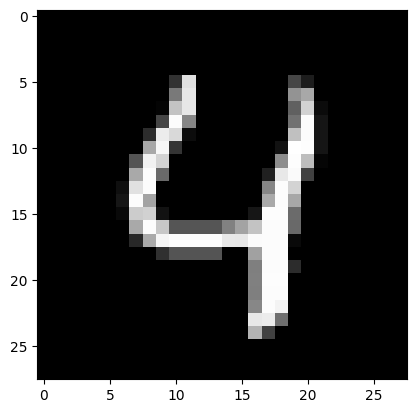

In [27]:
import matplotlib.pyplot as plt

model.eval()

data, target = test_data[4]

output = model(data)

prediction = output.argmax(dim=1, keepdim=True).item()

print(f'Prediction: {prediction}')

image = data.squeeze(0).squeeze(0).cpu().numpy()

plt.imshow(image,cmap='gray')
plt.show()